# Hypothesis, Annotations, and Engagement

In [1]:
import datetime
import json
import re
from statistics import mean, median
from pathlib import Path

from tabulate import tabulate
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
data_dir = Path("../data")
input_files = list(data_dir.glob("Hypothesis*.csv"))

# Initialise output dataframe for individual readings
readings_cols = ["course", "instructor", "date",
                 "month", "week", "title", "url", "total", "resp"]
readings = pd.DataFrame(columns=readings_cols)

dfs = []
for f in input_files:
    try:
        df = pd.read_csv(f, parse_dates=["Date"])
        df['month'] = df.Date.map(lambda x: x.month)
        df['week'] = df.Date.map(lambda x: x.week)
        df['week'] = df['week'] - min(df['week']) + 1
    except Exception as e:
        print("Skipping {}".format(f.name))
        continue

    dfs.append(df)

    course = df["Course Number"][0]
    instructor = df["First Name"][0] + " " + df["Last Name "][0]

    for ix, row in df.iterrows():
        readings.loc[len(readings)] = [course, instructor, row['Date'], row['month'],
                                       row['week'], row['Title'], row['Link '], None, None]

df = pd.concat(dfs, sort=False)

classes_cols = ["Course Number", "Course Name", "First Name", "Last Name ", "Email"]
classes = df.groupby(classes_cols)["Link "].count().reset_index()
classes.to_csv("../data/courses.csv")

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("Paired")

savefigs = True

URL_PATTERN = "((http|ftp|https):\/\/[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?)"

data_dir = Path("../data")
plot_dir = Path("../plots")

courses_file = data_dir / "courses.csv"
comments_file = data_dir / "comments.csv"
readings_file = data_dir / "readings.csv"

## The Data

### 1. Making Knowledge Public - Course Material

Data retrieved from course page

In [23]:
# classes = pd.read_json(str(classes_file), orient="records").T
# classes.date = classes.date.map(lambda x: x + "T17:30")
# classes.date = pd.to_datetime(classes.date, format="%d/%m/%YT%H:%M")
# usernames = json.load(open(str(usernames_file)))

## 3. Our Annotations

Data retrieved for the individual readings from the Hypothesis API

In [77]:
comments[comments.course=="PUB 802"].url_id.value_counts()

80     535
137    111
83      25
77      19
143     15
123     14
79      11
110     11
81       8
91       8
114      7
78       6
82       4
98       3
97       2
112      2
109      1
75       1
Name: url_id, dtype: int64

In [75]:
comments.course.value_counts()

PUB 802      783
CMNS 432      62
GSWS 319       6
Name: course, dtype: int64

In [71]:
courses = pd.read_csv(str(courses_file))
comments = pd.read_csv(str(comments_file), index_col="id", parse_dates=['created', 'updated'])
readings = pd.read_csv(str(readings_file), index_col="id", parse_dates=['date'])

comments = comments.merge(readings[['url', 'week', 'course', 'date', 'instructor']], left_on="url_id", right_index=True)

In [67]:
comments[comments.created>pd.Timestamp(datetime.date(2019, 1, 1))]

,url_id,user,text,created,updated,references,url,week,course,date,instructor
id,,,,,,,,,,,
tqop2BXxEemGzWtmUNsjzw,0,mateodededalmases,These are all top-bottom approaches which are ...,2019-01-11 22:39:10.601358,2019-01-11 22:39:10.601358,NaN,https://via.hypothes.is/https://www.theguardia...,1,CMNS 432,2019-01-04,Daniel Ahadi
Q1whyhXxEem-0RMx3goKtw,0,mateodededalmases,The left knelt to neoliberalism way before the...,2019-01-11 22:35:57.058800,2019-01-11 22:35:57.058800,NaN,https://via.hypothes.is/https://www.theguardia...,1,CMNS 432,2019-01-04,Daniel Ahadi
woJrKBVoEemsFiOxHUF1Sw,0,sophiet,Economic liberalism is a system that allows fo...,2019-01-11 06:18:49.360269,2019-01-11 06:18:49.360269,NaN,https://via.hypothes.is/https://www.theguardia...,1,CMNS 432,2019-01-04,Daniel Ahadi
VU5qlhVbEempI8M4MHsW1w,0,sebastianmbarreto,I believe a leading reason behind the rise of ...,2019-01-11 04:42:42.536692,2019-01-11 04:42:42.536692,NaN,https://via.hypothes.is/https://www.theguardia...,1,CMNS 432,2019-01-04,Daniel Ahadi
1QKbShSdEemv_dvoHGv0kw,0,suzcmns432,I think this is too idealistic. Yes it is in n...,2019-01-10 06:06:12.632186,2019-01-10 06:06:12.632186,NaN,https://via.hypothes.is/https://www.theguardia...,1,CMNS 432,2019-01-04,Daniel Ahadi
ZaT-HhSdEemfR8vgL_DPlg,0,suzcmns432,What does the author suggest is the answer? I ...,2019-01-10 06:03:05.590091,2019-01-10 06:03:05.590091,NaN,https://via.hypothes.is/https://www.theguardia...,1,CMNS 432,2019-01-04,Daniel Ahadi
ioCK9hr_EemofOsOkHooEA,6,saniyaJ,It's a sad truth. Social media plays important...,2019-01-18 09:00:45.233359,2019-01-18 09:00:45.233359,NaN,https://via.hypothes.is/https://www.theguardia...,2,CMNS 432,2019-01-11,Daniel Ahadi
xQ9oHBouEemh7vPav5yPIw,6,markjdunn,I'd argue that a significant part of the popul...,2019-01-17 08:06:18.635374,2019-01-17 08:06:18.635374,NaN,https://via.hypothes.is/https://www.theguardia...,2,CMNS 432,2019-01-11,Daniel Ahadi
J7hQrBotEemmMEdVCkMbWA,6,markjdunn,"Okay, so I can't say for sure, but I'd imagine...",2019-01-17 07:54:45.142437,2019-01-17 07:54:45.142437,NaN,https://via.hypothes.is/https://www.theguardia...,2,CMNS 432,2019-01-11,Daniel Ahadi


In [62]:
print("All comments: {}".format(len(comments)))

before_pdc = comments.created<pd.Timestamp(datetime.date(2019, 1, 1))
comments = comments[~before_pdc]

print("Comments before term: {}".format(sum(before_pdc)))
print("Comments before term: {}".format(len(comments)))

All comments: 851
Comments before term: 778
Comments before term: 73


In [52]:
comments['length'] = comments.text.map(lambda x: len(str(x)))
comments['created_day'] = comments.created.map(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day))
comments['Has URL'] = comments.text.map(lambda x: re.search(URL_PATTERN, x) is not None if not pd.isna(x) else None)

All comments: 851
Comments before term: 778
Comments before term: 73


---

In [19]:
comments.course.value_counts()

CMNS 432     62
GSWS 319      6
PUB 802       3
Name: course, dtype: int64

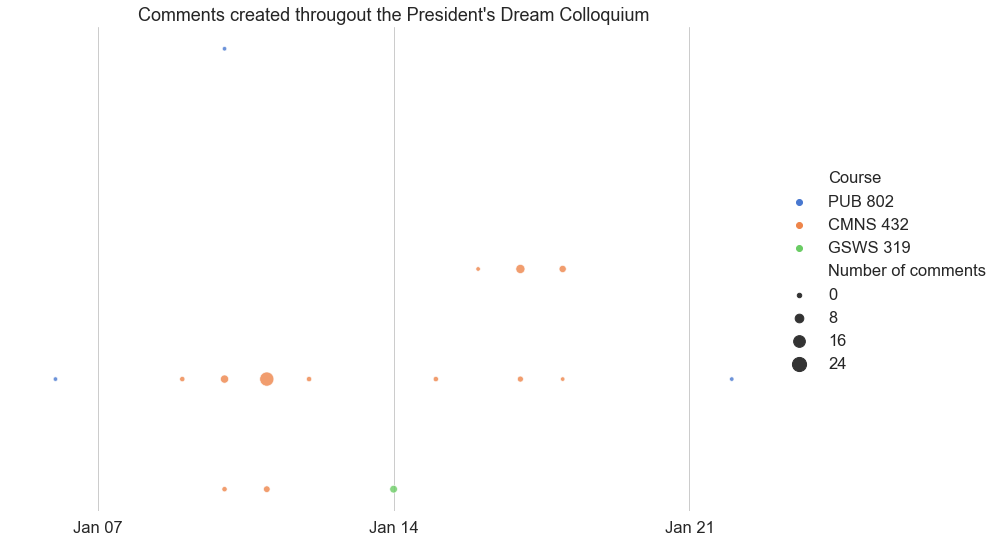

In [15]:
pdf = comments.groupby(["created_day", "week", "course"]).count()['text'].reset_index()
pdf.columns = ['Date', 'Week', "Course", 'Number of comments']

g = sns.relplot(x="Date", y="Week", hue="Course", size="Number of comments", alpha=.8,
            sizes=(20,200), palette="muted", data=pdf, height=8, aspect=1.5);
ax = g.facet_axis(0,0)
# ax.legend()
# plt.close(g.fig)

ax.set_xlim((min(pdf.Date)-pd.Timedelta('1 days'), max(pdf.Date)+pd.Timedelta('1 days')));

weekFormatter = mdates.DateFormatter('%b %d');
ax.xaxis.set_major_formatter(weekFormatter);

mondays = mdates.WeekdayLocator(mdates.MONDAY)
ax.xaxis.set_major_locator(mondays)

# plt.gcf().autofmt_xdate();

# weeks = list(range(1,13))
# plt.yticks(weeks)
# for w in readings.week.unique():
#     date = classes.loc[w, 'date']
#     ax.vlines(date, w-.5, w+.5, colors="r", lw=3, alpha=1)
#     plt.text(date+pd.Timedelta("1 days"), w-.7, "Week {}".format(w), fontsize=14, color="r")

plt.xlabel("")
plt.title("Comments created througout the President's Dream Colloquium")
ax.yaxis.set_visible(False)
# ax.xaxis.grid(False)
sns.despine(right=True, top=True, left=True, bottom=True)

if savefigs:
    plt.savefig(str(plot_dir / "week_overview.png"), bbox_inches="tight")

In [100]:
comments['last_minute'] = comments.apply(lambda x: x.created - classes.loc[x.week, 'date'], axis=1)
comments['last_minute'] =  comments['last_minute'].map(lambda x: x.days + x.seconds//86400 if x.days > 0 else x.days - x.seconds//86400)

plt.hist(comments.last_minute[comments.last_minute<2], bins=8, normed=True);
plt.xticks([i+.5 for i in range(-7, 1)], list(range(-7, 1)));
plt.xlabel("Days until class");
plt.yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,.4], ["{}".format(i) for i in range(0,41,5)])
plt.ylabel("Comments [%]")
plt.gca().xaxis.grid(False)
sns.despine(right=True, top=True, left=True)

if savefigs:
    plt.savefig(str(plot_dir / "days_before_class.png"), bbox_inches="tight")

AttributeError: 'DataFrame' object has no attribute 'last_minute'

## Comments per part, week, and readings

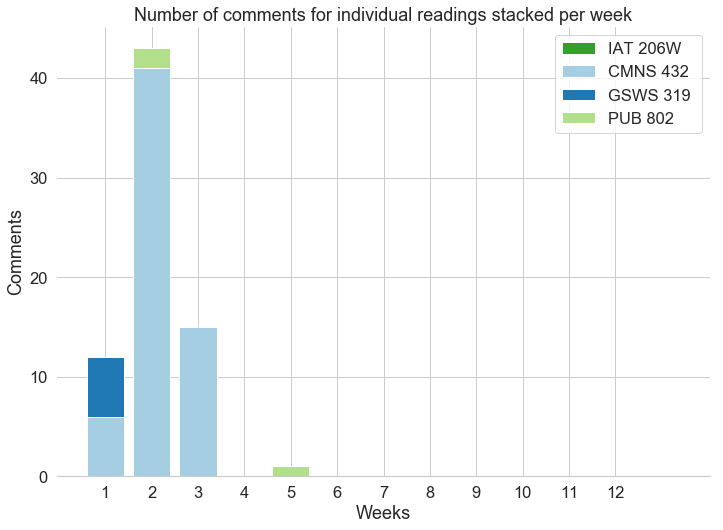

In [175]:
# f, ax = plt.subplots(figsize=(6, 15))
readings_per_week = readings.reset_index().groupby("week")["id"].apply(list)
comments_per_week = comments.groupby("url_id")["url_id"].count()

pdf = pd.DataFrame(columns = ["week", "reading", "comments"])
for w, rs in readings_per_week.items():
    for r in rs:
        rel_readings = readings_per_week.loc[w]
        rel_readings = rel_readings[:rel_readings.index(r)+1]
        pdf.loc[len(pdf)+1] = [w, r, comments_per_week.reindex(rel_readings).sum()]

courses = list(readings.course.unique())
c = sns.color_palette(n_colors=len(courses))
colors = {course:col for course, col in zip(courses, c)}

for i, row in pdf[::-1].iterrows():
    reading = int(row['reading'])
    week = row['week']
    course = readings.loc[reading].course
    if course in courses:
        label = course
        courses.remove(course)
    else:
        label = None

    color = colors[course]
    plt.bar(week, row['comments'], color=color, label=label)

plt.ylabel("Comments")    
plt.xlabel("Weeks")
plt.title("Number of comments for individual readings stacked per week")
plt.xticks(range(1, int(max(pdf.week))))

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])

sns.despine(right=True, top=True, left=True)

if savefigs:
    plt.savefig(str(plot_dir / "comments_per_reading.png"), bbox_inches="tight")

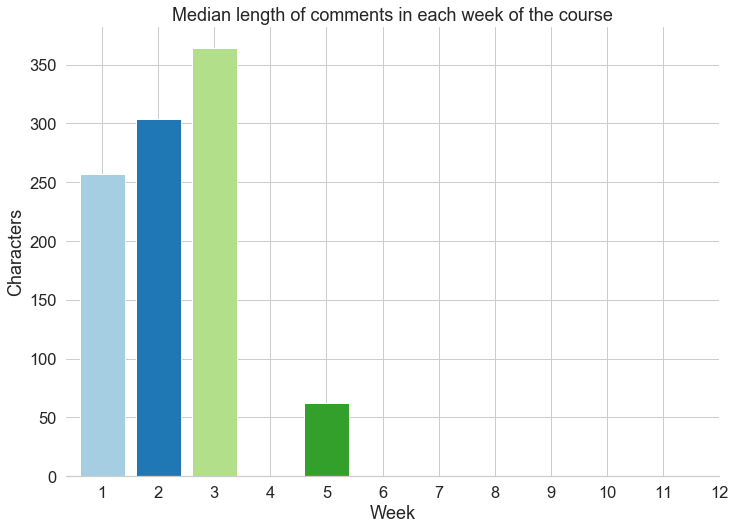

In [160]:
comments_per_week = comments.groupby("week")["length"].median()

months = list(readings.month.unique())
c = sns.color_palette(n_colors=len(months))

for i, l in comments_per_week.iteritems():
    plt.bar(i, l)

plt.legend()
plt.ylabel("Characters")
plt.xlabel("Week")
plt.title("Median length of comments in each week of the course")
plt.xticks(range(1, 13))

sns.despine(right=True, top=True, left=True)

if savefigs:
    plt.savefig(str(plot_dir / "med_comment_length.png"), bbox_inches="tight")

## Comments and median lenghts

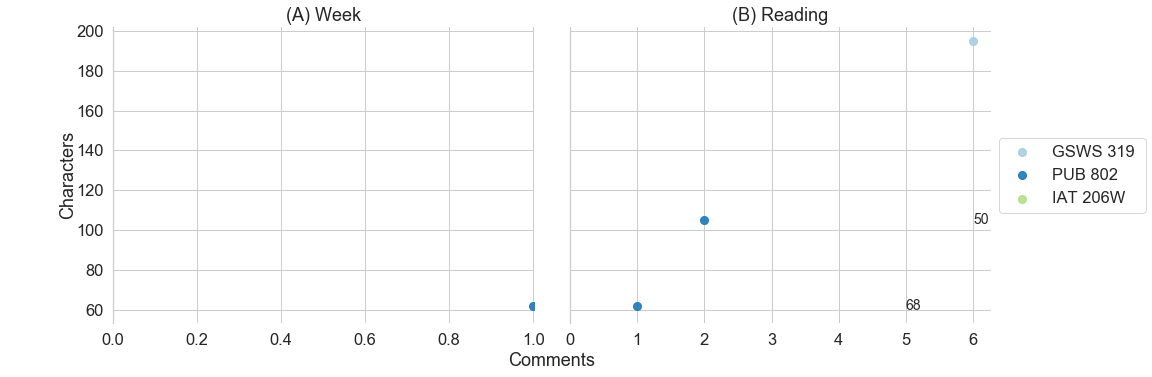

In [149]:
fig, axes = plt.subplots(1,2,figsize=(14,6), sharey=True)

labels = ["(A) Week", "(B) Reading"]
for ax, by, l in zip(axes, ["week", "url_id"], labels):
    df = pd.DataFrame()
    df['comments'] = comments.groupby(by)["length"].count()
    df['length'] = comments.groupby(by)["length"].median()
    df['course'] = df.index.map(lambda x: comments[comments[by]==x].course.iloc[0]).astype("category")
    
    df.reset_index(inplace=True)
    
    for i in courses:
        pdf = df[df.course == i]
        ax.scatter(pdf['comments'], pdf['length'], s=65, alpha=0.9, label = "{}".format(i))
    
    for i, row in df.iterrows():
        ax.annotate(int(row[by]),
                    (row['comments']+4, row['length']),
                    horizontalalignment='left',
                    verticalalignment='center',
                    size=14)

    ax.set_title(l)   
    ax.set_xlim(0, ax.get_xlim()[1])
    sns.despine(bottom=True, ax=ax)

box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.ylabel("Characters")
plt.xlabel("Comments")

plt.tight_layout()
plt.legend()

if savefigs:
    plt.savefig(str(plot_dir / "comments_vs_length.png"), bbox_inches="tight")

## Parts, weeks, readings per user

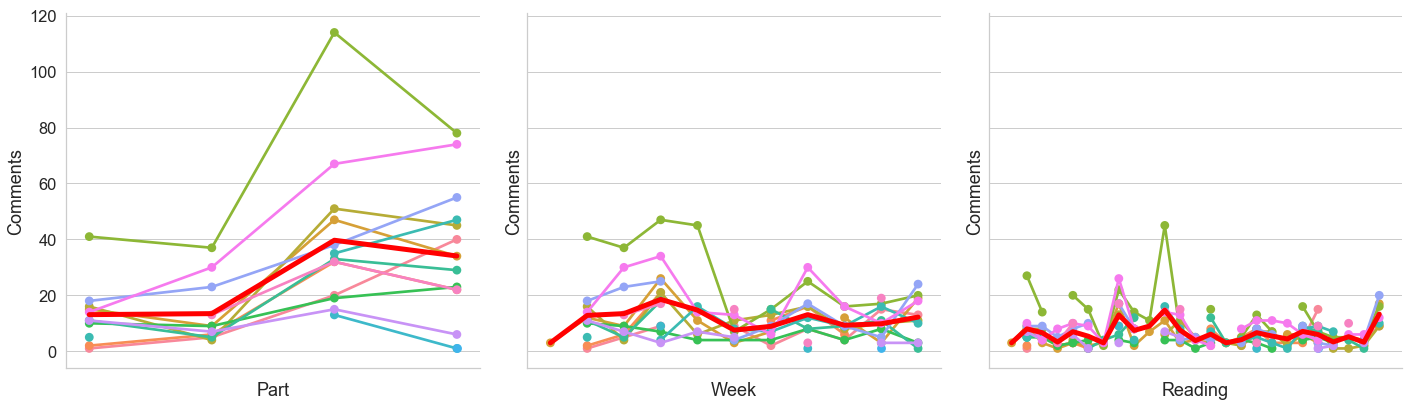

In [247]:
fix, axes = plt.subplots(1,3,figsize=(20,6), sharey=True)
labels = ["Part", "Week", "Reading"]
for ax, by, l in zip(axes, ["part", "week", "url_id"], labels):
    pdf = comments.groupby(["user", by])['text'].count().reset_index()
    sns.pointplot(x=by, y="text", hue="user", data=pdf, ax=ax,  lw=1)
    
    x = pdf.groupby([by]).mean()
    ax.plot(x.text.values, c="red", lw="5", zorder=100)

    ax.legend_.remove()
    ax.set_xlabel(l);
    ax.set_xticklabels([])
    ax.set_ylabel("Comments")
    sns.despine(right=True, top=True, ax=ax)
plt.tight_layout()

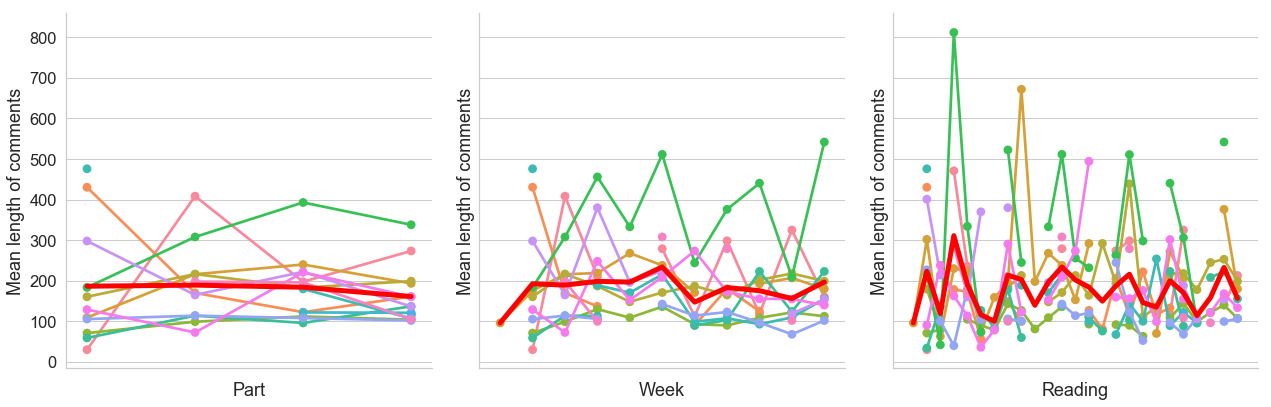

In [248]:
fix, axes = plt.subplots(1,3,figsize=(18,6), sharey=True)
labels = ["Part", "Week", "Reading"]
for ax, by, l in zip(axes, ["part", "week", "url_id"], labels):
    pdf = comments.groupby(["user", by])['length'].median().reset_index()
    sns.pointplot(x=by, y="length", hue="user", data=pdf, ax=ax,  lw=1)
    
    x = pdf.groupby([by]).mean()
    ax.plot(x.length.values, c="red", lw="5", zorder=100)

    ax.legend_.remove()
    ax.set_xlabel(l);
    ax.set_xticklabels([])
    ax.set_ylabel("Mean length of comments")
    sns.despine(right=True, top=True, ax=ax)
plt.tight_layout()

## Number of comments and the median length

In [80]:
counts

,total,median
Octavio_West,23,275.0
HCristea,17,89.0
Alissagal8,16,75.0
GeneralResearch,15,44.0
cherishphillips,13,176.0
mmcinty2,13,225.0
tmalonee,12,182.5
Liamcahill6,11,96.0
jcc1007Clark,11,111.0
gabbay22,11,81.0


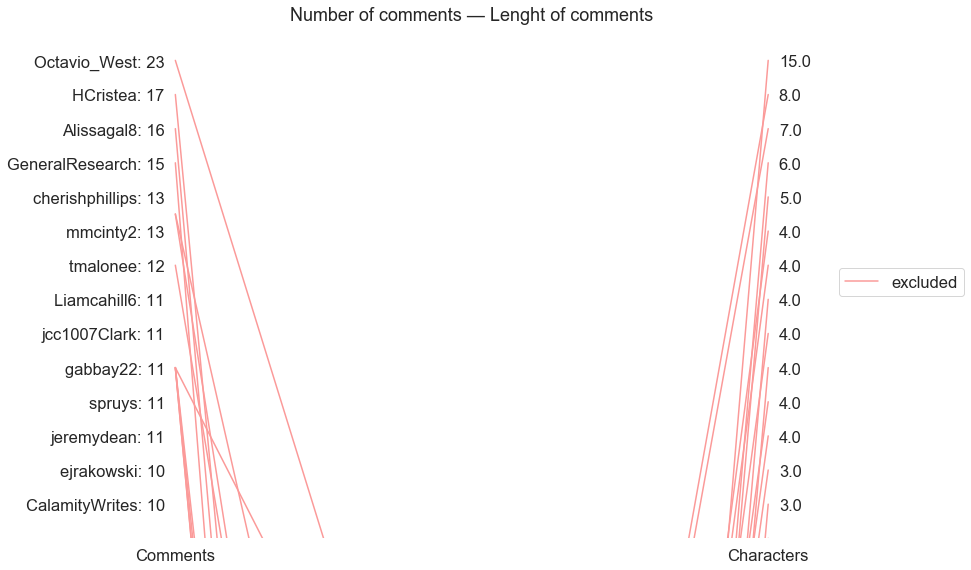

In [79]:
counts = pd.DataFrame(columns=["total", "median"])
counts['total'] = comments.user.value_counts()
counts['median'] = comments.groupby("user")["text"].apply(lambda x: median([len(str(y)) for y in x.tolist()]))
# counts.rank(ascending=False).T.plot(legend=False)

groups = {
    "High-Long": ["aliceLF", "KariGustafson", "michelle_la"],
    "High-Short": ["anastasiak", "mawaters"],
    "Low-Long": ["Bubblbu", "camilleweinsheimer", "melissa_roach"], 
    "Low-Short": ["carina.albrecht", "cypriine", "CSG", "vreichsh"],
}

col = sns.color_palette(n_colors=5)
pdf = counts.rank(ascending=False)
labels = []
for i, row in pdf.iterrows():
    l = None
    c = None
    for ix, (g, names) in enumerate(groups.items()):
        if i in names:
            l = g
            c = col[ix]        
    if not l:
        l = "excluded"
        c = col[-1]
        
    plt.plot([row['total'],row['median']], label=l if l not in labels else "", c=c)
    labels.append(l)
    
# plt.legend(loc="right")
# Shrink current axis by 20%
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

ax1 = plt.gca()
ax1.set_ylim((0,15))

ax2 = ax1.twinx()
ax2.set_ylim((0,15))

ax1.set_yticks(range(1, 15))
ax2.set_yticks(range(1, 15))

labels_1 = []
for k, v in counts['total'].items():
    labels_1.append("{}: {}".format(k, v))
ax1.set_yticklabels(labels_1)

labels_2 = []
for k, v in counts['median'].sort_values().items():
    labels_2.append("{}".format(v))
ax2.set_yticklabels(labels_2)

ax1.invert_yaxis()

plt.title("Number of comments — Lenght of comments")
plt.xticks([0,1], ["Comments", "Characters"]);
ax1.grid(False)
ax2.grid(False)
ax1.yaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')
ax1.tick_params(axis='y', pad=-25)
ax2.tick_params(axis='y', pad=-25)

# plt.subplots_adjust(hspace=0)


plt.tight_layout()
sns.despine(right=True, top=True, bottom=True, left=True, trim=True)

if savefigs:
    plt.savefig(str(plot_dir / "user_ranks_length_vs_comments.png"), bbox_inches="tight")

### Reading Times

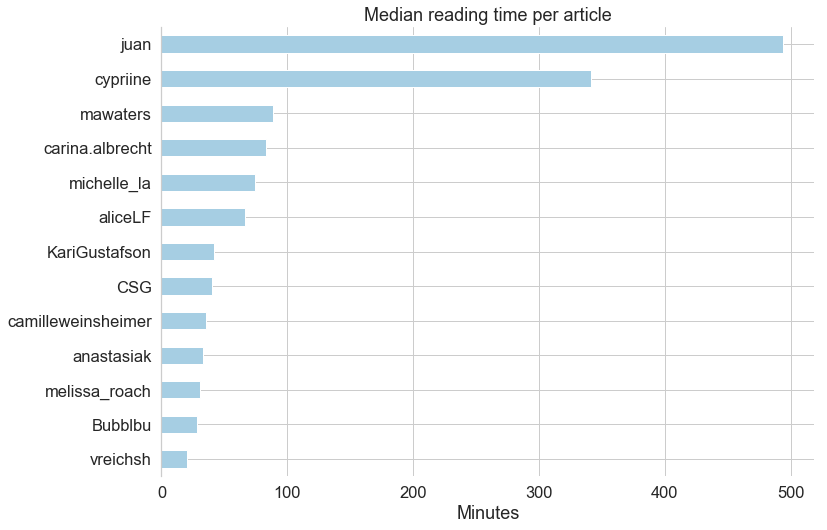

In [287]:
reading_times = pd.DataFrame(columns=["url_id", "week", "part", "user", "mins", "comments"])

for user in usernames:
    for uid in comments.url_id.unique():
        c = comments[(comments.user==user)&(comments.url_id==uid)]
        count = len(c)
        if count > 1:
            reading_time = max(c.created)-min(c.updated)
            reading_time = int(reading_time.seconds // 60)
            reading_times.loc[len(reading_times)+1] = [uid, c.week.iloc[0], c.part.iloc[0], user, reading_time, count]
reading_times.mins = reading_times.mins.astype(int)
reading_times.comments = reading_times.comments.astype(int)
pd.DataFrame(reading_times.groupby("user")['mins'].median()).sort_values(by="mins").plot(kind="barh", legend=False)
plt.title("Median reading time per article")
plt.xlabel("Minutes")
plt.ylabel("")
sns.despine(right=True, top=True, bottom=True)

if savefigs:
    plt.savefig(str(plot_dir / "reading_times.png"), bbox_inches="tight")

## Comments with URLs

What about annotations that link to other material?
Is that a particularly engaging activity?

In [88]:
comments['Has URL'].sum()/

0.08242612752721618

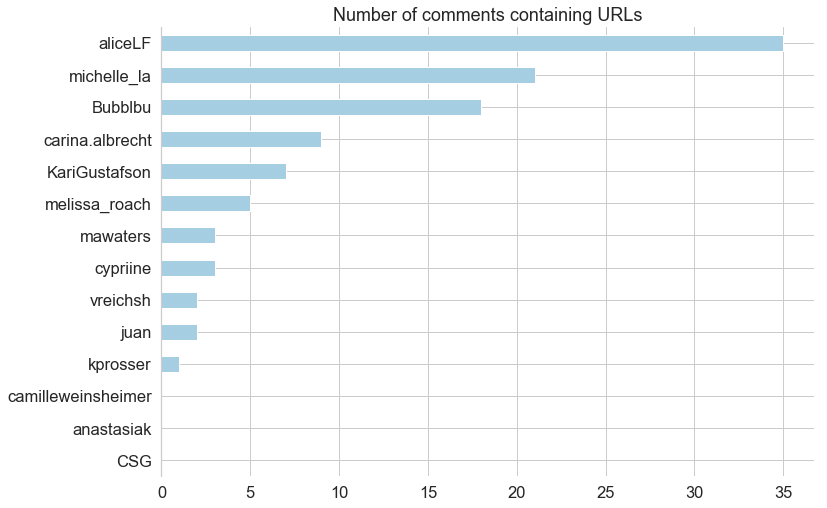

In [288]:
pdf = comments.groupby("user")['Has URL'].apply(lambda x: sum([int(y) if not pd.isna(y) else 0 for y in x]))
pd.DataFrame(pdf).sort_values(by="Has URL").plot(kind="barh", legend=False)
plt.title("Number of comments containing URLs")
plt.ylabel("")
sns.despine(right=True, bottom=True, top=True)

if savefigs:
    plt.savefig(str(plot_dir / "comments_with_urls.png"), bbox_inches="tight")

## Number of comments as a measure of engagement

In [261]:
df = pd.DataFrame(columns=['part', 'survey_part', 'week', 'survey_week', 'reading', 'survey_reading'])
by = "text"

x = comments.groupby(["user", "part"])[by].count().reset_index()
df['part'] = x.groupby("user").apply(lambda x: x.loc[x[by].idxmax()])['part']

x = comments.groupby(["user", "week"])[by].count().reset_index()
df['week'] = x.groupby("user").apply(lambda x: x.loc[x[by].idxmax()])['week']

x = comments.groupby(["user", "url_id"])[by].count().reset_index()
df['reading'] = x.groupby("user").apply(lambda x: x.loc[x[by].idxmax()])['url_id']

df['survey_part'] = eng_survey['eng_part']
df['survey_week'] = eng_survey['eng_week']
df['survey_reading'] = eng_survey['eng_reading']
df = df.dropna()

cols = ["part", "week", "reading"]
matches = pd.DataFrame(columns=cols)
for c in cols:
    for i in df.index.tolist():
        if not pd.isna(df.loc[i, c]) and not pd.isna(df.loc[i, "survey_" + c]):
            survey_max = df.loc[i,"survey_" + c]
            if c=="reading":
                d = "url_id"
            else:
                d = c
            ranks = comments.groupby(["user", d])['text'].count()[i].rank(ascending=False)
            if survey_max in ranks:
                pos = ranks.loc[survey_max]
            else:
                pos = len(ranks)
            matches.loc[i, c] = pos
        else:
            matches.loc[i, c] = None
matches_count = matches

## Length of comments as engagement

In [262]:
df = pd.DataFrame(columns=['part', 'survey_part', 'week', 'survey_week', 'reading', 'survey_reading'])

by = "length"
x = comments.groupby(["user", "part"])[by].mean().reset_index()
df['part'] = x.groupby("user").apply(lambda x: x.loc[x[by].idxmax()])['part']

x = comments.groupby(["user", "week"])[by].mean().reset_index()
df['week'] = x.groupby("user").apply(lambda x: x.loc[x[by].idxmax()])['week']

x = comments.groupby(["user", "url_id"])[by].mean().reset_index()
df['reading'] = x.groupby("user").apply(lambda x: x.loc[x[by].idxmax()])['url_id']

df['survey_part'] = eng_survey['eng_part']
df['survey_week'] = eng_survey['eng_week']
df['survey_reading'] = eng_survey['eng_reading']
df = df.dropna()

cols = ["part", "week", "reading"]
matches = pd.DataFrame(columns=cols)
for c in cols:
    for i in df.index.tolist():
        if not pd.isna(df.loc[i, c]) and not pd.isna(df.loc[i, "survey_" + c]):
            survey_max = df.loc[i,"survey_" + c]
            if c=="reading":
                d = "url_id"
            else:
                d = c
            ranks = comments.groupby(["user", d])['length'].mean()[i].rank(ascending=False)
            if survey_max in ranks:
                pos = ranks.loc[survey_max]
            else:
                pos = len(ranks)
            matches.loc[i, c] = pos
        else:
            matches.loc[i, c] = None
matches_length = matches

In [314]:
x = readings[['title', 'type', 'author', 'url', 'total']]
x.columns = ["Title", "Type", "Authors", "URL", "Comments"]
x.index.name = ""
print(tabulate(x, tablefmt="pipe", headers="keys"))

|    | Title                                                                                                                                                     | Type         | Authors                                                                                                               | URL                                                                                                                                                                     |   Comments |
|---:|:----------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------|:----------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------:|
|  1 | The Access Principle: The Case 

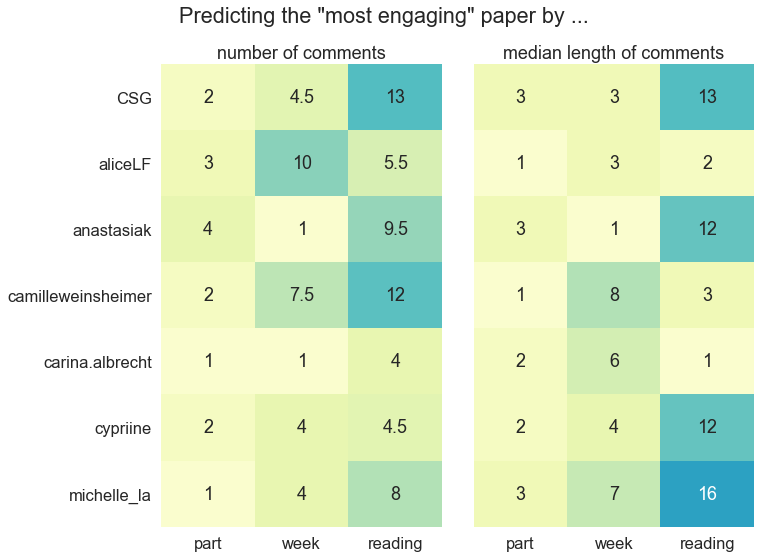

In [266]:
fig, axes = plt.subplots(1,2, sharey=True, sharex=True, figsize=(11,8))
titles = ["number of comments", "median length of comments"]
for ax, pdf, t in zip(axes, [matches_count, matches_length], titles):
    pdf = pdf.astype(float).dropna()
    sns.heatmap(data=pdf.values, vmin=0, vmax=28, annot=True, cbar=False, cmap="YlGnBu", ax=ax)
    ax.set_xticks([0.5,1.5,2.5])
    ax.set_xticklabels(["part", "week", "reading"]);
    ax.set_yticks([i-.5 for i in range(1, len(pdf)+1)])
    ax.set_yticklabels(pdf.index.values, rotation=0);
    ax.set_title(t);
plt.suptitle("Predicting the \"most engaging\" paper by ...");
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.88)

if savefigs:
    plt.savefig(str(plot_dir / "engagement_predictors.png"), bbox_inches="tight")

In [93]:
df = pd.DataFrame.from_dict({"part":4, "week":12, "reading":28}, orient="index", columns=["n"])
df['count_accuracy'] = (df.n-matches_count.mean())/(df.n-1)
df['length_accuracy'] = (df.n-matches_length.mean())/(df.n-1)
df

,n,count_accuracy,length_accuracy
reading,28,0.735450,0.724868
week,12,0.675325,0.675325
part,4,0.619048,0.619048
